# Machine Learning: Classification Methods

The purpose of the this project is to explore the various classification methods introduced in this course. This would be done through the analysis of a loan dataset which includes the details of 346 customers whose loans are already paid off or defaulted.

### Importing the Data

In [1]:
#Importing the necessary packages to begin importing data and preprocessing the dataframe
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Downloading the dataset and loading the data into a dataframe
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
df = pd.read_csv('loan_train.csv')
df.head()

--2020-07-23 17:48:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-07-23 17:48:15 (1.19 MB/s) - ‘loan_train.csv’ saved [23101/23101]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Data Preprocessing and Visualization

In [3]:
#Preprocessing of the data
#Converting to date time object
df["due_date"] = pd.to_datetime(df["due_date"])
df["effective_date"] = pd.to_datetime(df["effective_date"])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


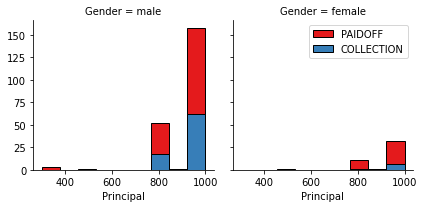

In [4]:
#Visualizing the data using seaborn
#Importing seaborn
import seaborn as sns

#Comparing by principal
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)
g.map(plt.hist, "Principal", bins = bins, ec = "k")

g.axes[-1].legend()
plt.show()

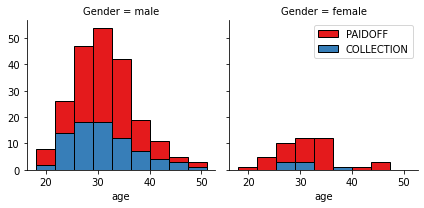

In [5]:
#Comparing by age
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)
g.map(plt.hist, "age", bins = bins, ec = "k")

g.axes[-1].legend()
plt.show()

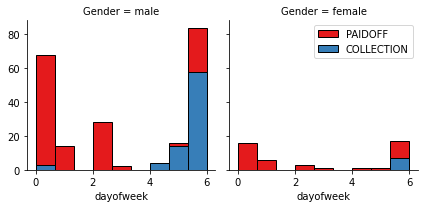

In [6]:
#Comparing by day of the week
df["dayofweek"] = df["effective_date"].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek', bins = bins, ec = "k")
g.axes[-1].legend()
plt.show()

In [7]:
#Since people who get loans at the end of the week don't pay it off, threshold values will be set to less then day 4
df["weekend"] = df["dayofweek"].apply(lambda x: 1 if (x > 3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [8]:
#Converting Categorical features to numerical values
df["Gender"].replace(to_replace = ["male", "female"], value = [0, 1], inplace = True)

#Converting categorical variables to binary and appending them to the dataframe using the one hot encoding technique
Feature = df[["Principal","terms","age","Gender","weekend"]]
Feature = pd.concat([Feature,pd.get_dummies(df["education"])], axis=1)
Feature.drop(["Master or Above"], axis = 1,inplace=True)

In [9]:
#Feature selection
X = Feature
y = df["loan_status"].values

In [10]:
#Data standardization. Normally done after train test split but in this project will be done here.
X= preprocessing.StandardScaler().fit(X).transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


### K Nearest Neighbor (KNN)

In [11]:
#Importing train_test_split and generating training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Checking set sizes
print ("Train set: ", X_train.shape,  y_train.shape)
print ("Test set: ", X_test.shape,  y_test.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


In [12]:
#Importing KNN classifier and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
#Calculating the accuracy of KNN classification model with different values of k
ks = 15
mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks - 1))
confusionmx = [];

#for loop calculating accuracy scores and storing them in an array
for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

In [14]:
#Best accuracy score and k value for KNN model
print( "Best accuracy score: ", mean_acc.max(), "\nk= ", mean_acc.argmax() + 1)

Best accuracy score:  0.7857142857142857 
k=  7


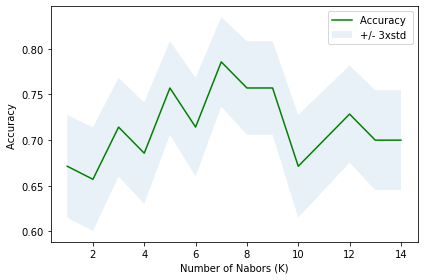

In [15]:
#Plotting model accuracy for different values of k
plt.plot(range(1, ks),mean_acc,'g')
plt.fill_between(range(1, ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Decision Tree

In [16]:
#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
#Generating training and testing groups
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 3)

#Checking set sizes
print ("Train set: ", X_train1.shape,  y_train1.shape)
print ("Test set: ", X_test1.shape,  y_test1.shape)

Train set:  (242, 8) (242,)
Test set:  (104, 8) (104,)


In [18]:
#Training the model using different max depth values and determing the most accurate model
depth = 10
mean_acc1 = np.zeros((depth - 1))

#For loop calculating accuracy score and storing the values in an array
for n in range(3, depth):
    dTree = DecisionTreeClassifier(criterion = "entropy", max_depth = n)
    dTree.fit(X_train1, y_train1)
    pTree = dTree.predict(X_test1)
    mean_acc1 [n-1] = metrics.accuracy_score(y_test1, pTree)

print("Best accuracy score: ", mean_acc1.max(), "\nmax_depth: ", mean_acc1.argmax() + 1)

Best accuracy score:  0.7019230769230769 
max_depth:  6


In [19]:
#Model visualization
#Importing the necessary packages
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.image as mpimg
%matplotlib inline 

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



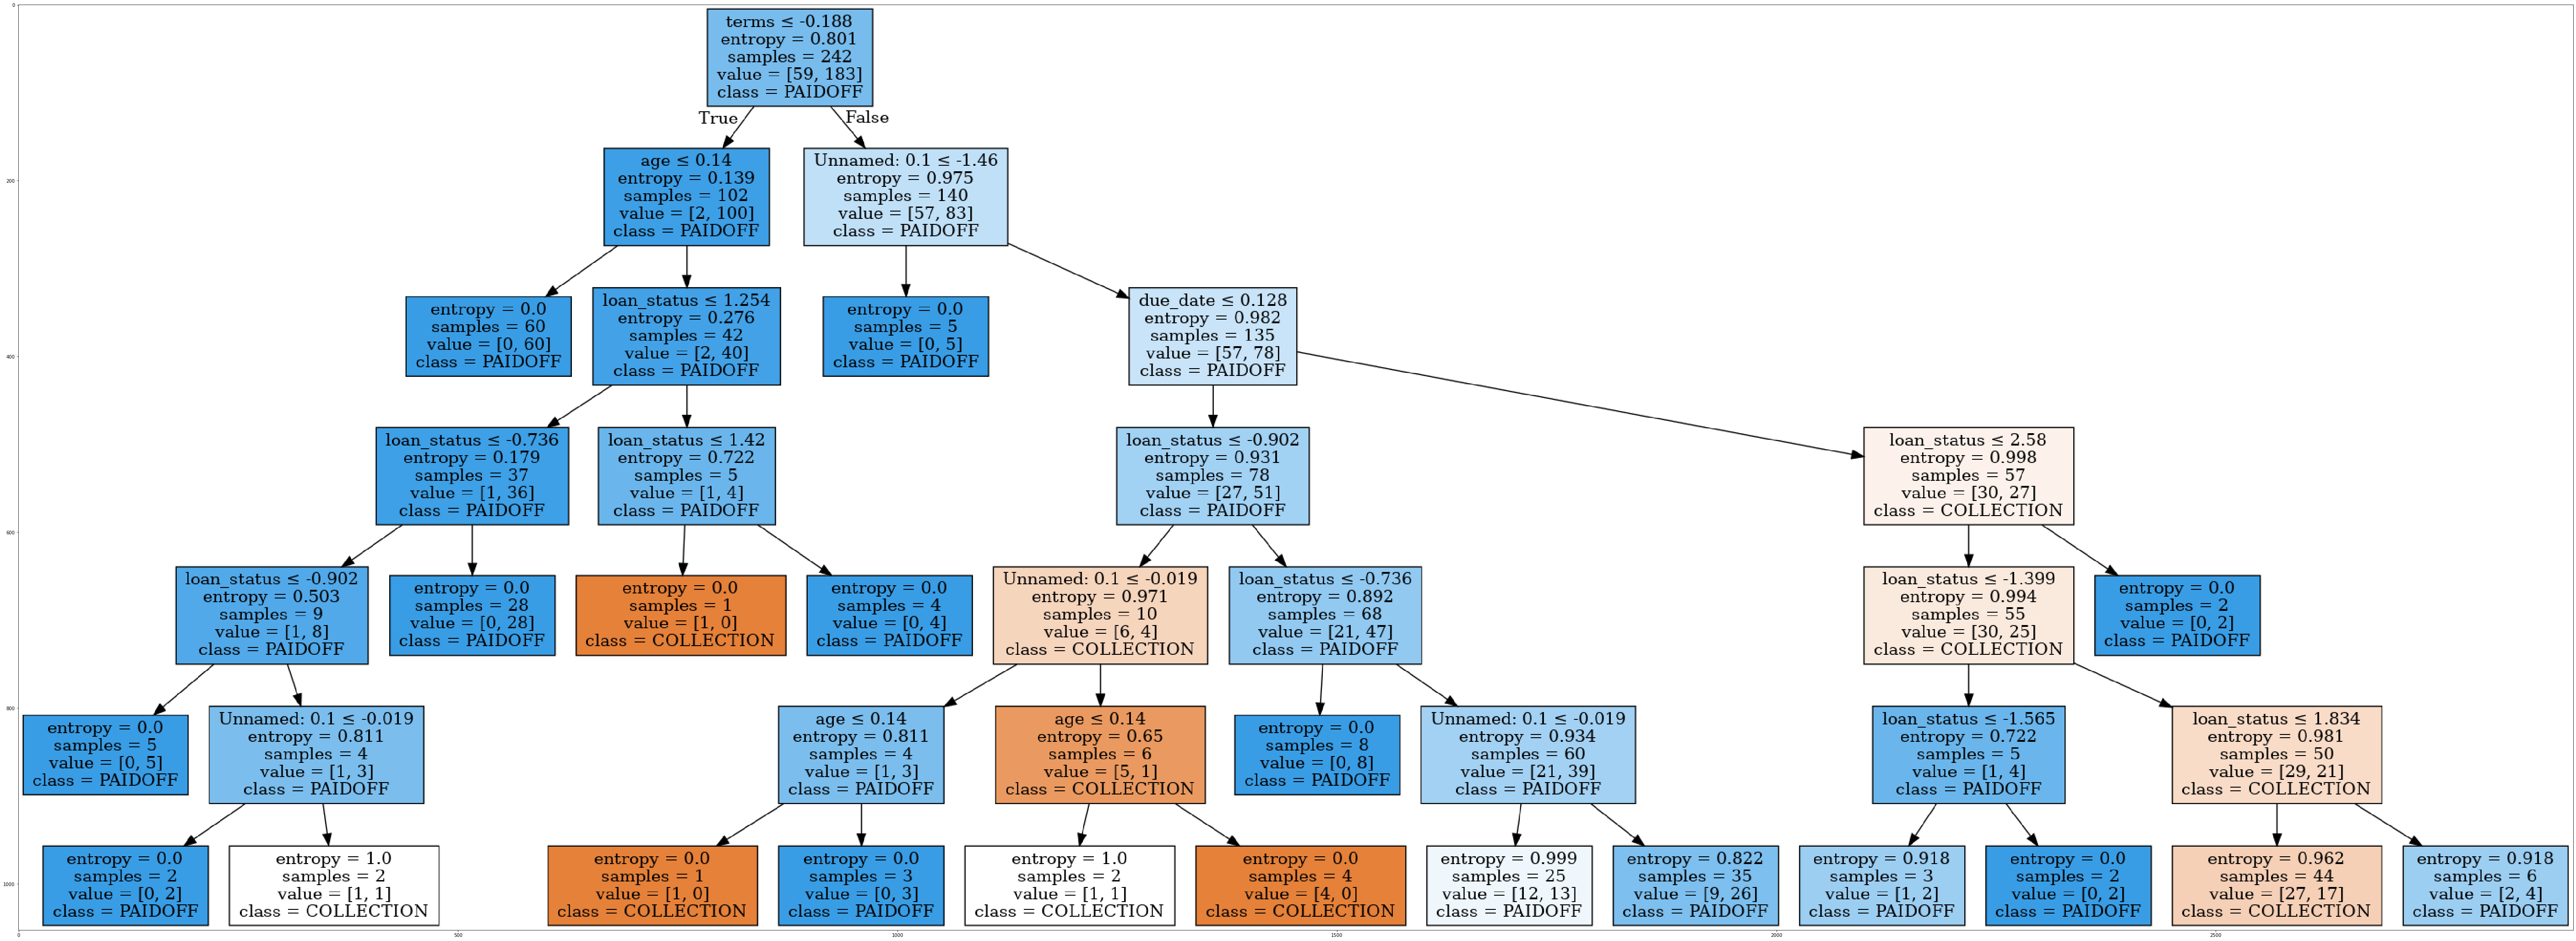

In [20]:
#Generating decision tree visualization for most accurate model
dTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 6)
dTree.fit(X_train1, y_train1)

dot_data = StringIO()
filename = "dtree.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(dTree, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True,  special_characters = True,rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation = "nearest")

### Support Vector Machine

In [21]:
#Importing svm from sklearn
from sklearn import svm

In [22]:
#Generating training and testing groups
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Checking set sizes
print ("Train set: ", X_train2.shape,  y_train2.shape)
print ("Test set: ", X_test2.shape,  y_test2.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


In [23]:
#Generating svm model using the default radial basis function
clf = svm.SVC(kernel = "rbf")
clf.fit(X_train2, y_train2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
#Accuracy evaluation using f1 score and jaccard similarity score
#Importing the necessary packages
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [25]:
#Plotting confusion matrix for the SVM model
#Importing the necessary packages
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
#Function for printing and plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
#Prediction based on the SVM model
yhat1 = clf.predict(X_test2)
print("F1 score: ", f1_score(y_test2, yhat1, average = "weighted"))
print("Jaccard similarity score", jaccard_similarity_score(y_test2, yhat1))

F1 score:  0.7275882012724117
Jaccard similarity score 0.7428571428571429


              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


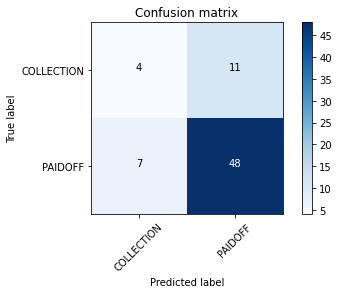

In [28]:
#Computing the confusion matrix and plotting it
cnf_matrix = confusion_matrix(y_test2, yhat1)
np.set_printoptions(precision = 2)
print(classification_report(y_test2, yhat1))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ["COLLECTION", "PAIDOFF"],normalize = False, title = "Confusion matrix")

### Logistic Regression

For this section, the target must be converted to type integer first before proceeding.

In [29]:
#Converting loan status to boolean values where PAIDOFF = 0 and COLLECTION = 1
df["loan_status"].replace(to_replace = ["PAIDOFF", "COLLECTION"], value = [0, 1], inplace = True)
y = df["loan_status"].values

In [30]:
#Generating training and testing groups
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 4)

#Checking set sizes
print ("Train set: ", X_train3.shape,  y_train3.shape)
print ("Test set: ", X_test3.shape,  y_test3.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


In [31]:
#Importing logistic regression and confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Generating the regression model and fitting the data set
lr = LogisticRegression(C = 1.0, solver = "liblinear").fit(X_train3, y_train3)

In [32]:
#Predictions using the model
yhat3 = lr.predict(X_test3)
yhat3[0:5]

array([1, 0, 0, 0, 0])

In [33]:
#Estimation probabilty using predict_proba
yhat3_prob = lr.predict_proba(X_test3)

### Model Evaluation using a test set

In [34]:
#Importing additional log_loss package
from sklearn.metrics import log_loss

In [35]:
#Downloading the test set and loading the data into a dataframe
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
test_df = pd.read_csv("loan_test.csv")
test_df.head()

--2020-07-23 17:49:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0.001s  

2020-07-23 17:49:12 (5.71 MB/s) - ‘loan_test.csv’ saved [3642/3642]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [36]:
#Preprocessing the test data prior to model evaluation
#Converting to date time object
test_df["due_date"] = pd.to_datetime(test_df["due_date"])
test_df["effective_date"] = pd.to_datetime(test_df["effective_date"])

#Converting Categorical features to numerical values
test_df["Gender"].replace(to_replace = ["male", "female"], value = [0, 1], inplace = True)

#Converting categorical variables to binary and appending them to the dataframe using the one hot encoding technique
Feature = test_df[["Principal","terms","age","Gender"]]
Feature = pd.concat([Feature, pd.get_dummies(test_df["education"])], axis=1)
Feature.drop(["Master or Above"], axis = 1,inplace=True)

test_df["loan_status"].replace(to_replace = ["PAIDOFF", "COLLECTION"], value = [0, 1], inplace = True)

In [37]:
#Feature and label selection
X1 = Feature
y1 = test_df["loan_status"].values

In [38]:
#Prediction values for each model
#KNN model
neigh1 = KNeighborsClassifier(n_neighbors = 7).fit(X1, y1)
yhat = neigh1.predict(X1)

#Decision Tree model
dTree1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 1).fit(X1, y1)
yhat1 = dTree1.predict(X1)

#SVM model
cdf1 = svm.SVC(kernel = "rbf").fit(X1, y1)
yhat2 = cdf1.predict(X1)

#logistic regression model
lr1 = LogisticRegression(C = 1.0, solver = "liblinear").fit(X1, y1)
yhat3 = lr1.predict(X1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
predictionarray = [yhat, yhat1, yhat2, yhat3]
accuracyscores = {"Algorithm" : ["KNN", "Decision Tree", "SVM", "LogisticRegression"],
                  "Jaccard" : [0, 0, 0, 0], "F1-score" : [0, 0, 0, 0], "LogLoss" : ["NA", "NA", "NA", 0]}
for i in range(len(predictionarray)):
    accuracyscores["Jaccard"][i] = jaccard_similarity_score(y1, predictionarray[i])
    accuracyscores["F1-score"][i] = f1_score(y1, predictionarray[i], average = "weighted")
    if i == 3:
        accuracyscores["LogLoss"][i] = log_loss(y1, predictionarray[i])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
accdf = pd.DataFrame(accuracyscores)
accdf

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.740741,0.683128,NA
1,Decision Tree,0.740741,0.630418,NA
2,SVM,0.888889,0.877613,NA
3,LogisticRegression,0.759259,0.695923,8.31491


From the combination of F1 and Jaccard similarity scores, the best model is determined to be the SVM model for this dataset.